In [21]:
# Step 1: Import Libraries
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
from tensorflow.keras import layers, models
from tensorflow.keras.utils import to_categorical
from sklearn.metrics import confusion_matrix

In [22]:
# Step 2: Load Fashion MNIST
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.fashion_mnist.load_data()

# Step 3: Preprocess Data
x_train = x_train.reshape(-1, 28, 28, 1).astype('float32') / 255.0
x_test = x_test.reshape(-1, 28, 28, 1).astype('float32') / 255.0

y_train_cat = to_categorical(y_train, 10)
y_test_cat = to_categorical(y_test, 10)

class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']


In [23]:
# Step 3: Preprocess Data
x_train = x_train.reshape(-1, 28, 28, 1).astype('float32') / 255.0
x_test = x_test.reshape(-1, 28, 28, 1).astype('float32') / 255.0

y_train_cat = to_categorical(y_train, 10)
y_test_cat = to_categorical(y_test, 10)

class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']


In [24]:

# Step 4: Build Improved CNN Model
model = models.Sequential([
    layers.Conv2D(64, (3, 3), activation='relu', input_shape=(28, 28, 1)),
    layers.BatchNormalization(),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Dropout(0.25),

    layers.Conv2D(128, (3, 3), activation='relu'),
    layers.BatchNormalization(),
    layers.MaxPooling2D((2, 2)),
    layers.Dropout(0.25),

    layers.Flatten(),
    layers.Dense(256, activation='relu'),
    layers.Dropout(0.5),
    layers.Dense(10, activation='softmax')
])

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [25]:

# Step 5: Compile the Model
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [26]:

# Step 6: Train the Model (for better performance use 20+ epochs)
history = model.fit(x_train, y_train_cat,
                    epochs=20,
                    batch_size=64,
                    validation_split=0.1)

Epoch 1/20
844/844 ━━━━━━━━━━━━━━━━━━━━ 19s 13ms/step - accuracy: 0.7562 - loss: 0.6753 - val_accuracy: 0.8657 - val_loss: 0.3577
Epoch 2/20
844/844 ━━━━━━━━━━━━━━━━━━━━ 12s 7ms/step - accuracy: 0.8636 - loss: 0.3704 - val_accuracy: 0.8898 - val_loss: 0.2945
Epoch 3/20
844/844 ━━━━━━━━━━━━━━━━━━━━ 6s 8ms/step - accuracy: 0.8819 - loss: 0.3202 - val_accuracy: 0.8898 - val_loss: 0.3265
Epoch 4/20
844/844 ━━━━━━━━━━━━━━━━━━━━ 6s 7ms/step - accuracy: 0.8844 - loss: 0.3090 - val_accuracy: 0.8992 - val_loss: 0.2685
Epoch 5/20
844/844 ━━━━━━━━━━━━━━━━━━━━ 10s 7ms/step - accuracy: 0.8964 - loss: 0.2875 - val_accuracy: 0.9093 - val_loss: 0.2525
Epoch 6/20
844/844 ━━━━━━━━━━━━━━━━━━━━ 10s 8ms/step - accuracy: 0.9004 - loss: 0.2664 - val_accuracy: 0.9060 - val_loss: 0.2586
Epoch 7/20
844/844 ━━━━━━━━━━━━━━━━━━━━ 10s 7ms/step - accuracy: 0.9060 - loss: 0.2547 - val_accuracy: 0.9168 - val_loss: 0.2334
Epoch 8/20
844/844 ━━━━━━━━━━━━━━━━━━━━ 6s 7ms/step - accuracy: 0.9086 - loss: 0.2459 - val_accura

In [27]:
# Step 7: Evaluate Accuracy
test_loss, test_acc = model.evaluate(x_test, y_test_cat)
print(f"\n✅ Test Accuracy: {test_acc * 100:.2f}%")

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9178 - loss: 0.2924

✅ Test Accuracy: 91.83%


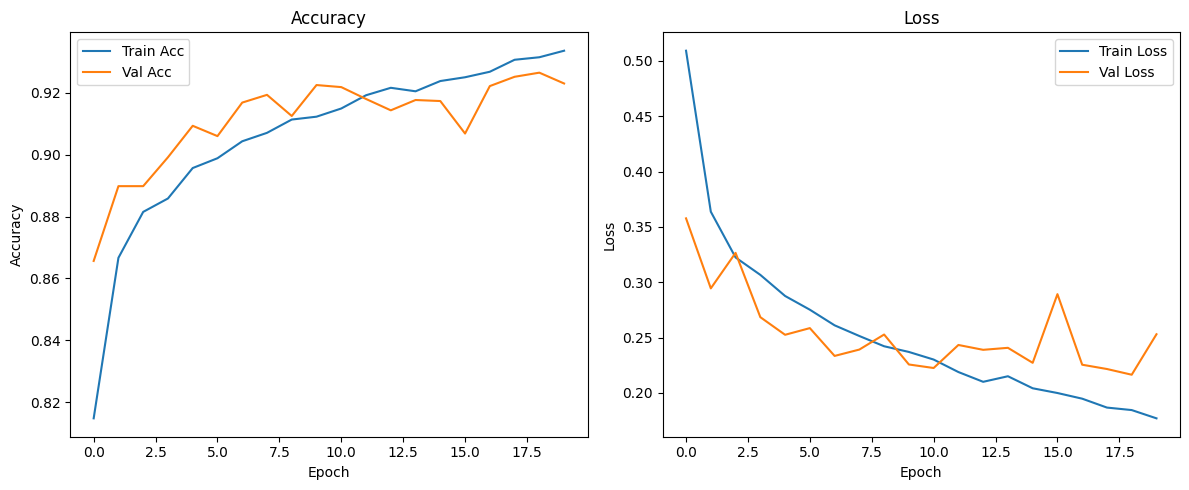

In [28]:
# Step 8: Plot Accuracy and Loss
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train Acc')
plt.plot(history.history['val_accuracy'], label='Val Acc')
plt.title('Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Val Loss')
plt.title('Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.tight_layout()
plt.show()

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 341ms/step


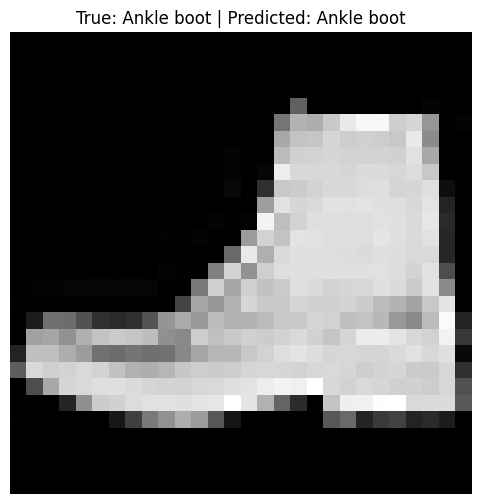

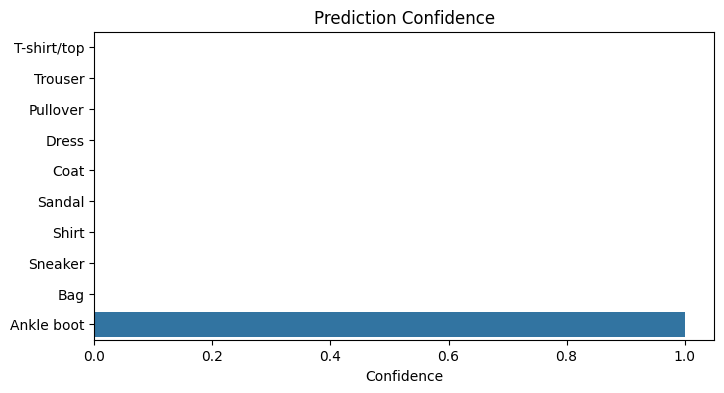

In [29]:

# Step 9: Predict and Show Confidence
import random
idx = random.randint(0, len(x_test)-1)
sample = x_test[idx]
true_label = y_test[idx]

prediction = model.predict(np.expand_dims(sample, axis=0))[0]
pred_label = np.argmax(prediction)

# Display Prediction with Confidence Bar
plt.figure(figsize=(6, 6))
plt.imshow(sample.reshape(28, 28), cmap='gray')
plt.title(f'True: {class_names[true_label]} | Predicted: {class_names[pred_label]}')
plt.axis('off')
plt.show()

# Plot Confidence Bar
plt.figure(figsize=(8, 4))
sns.barplot(x=prediction, y=class_names)
plt.title("Prediction Confidence")
plt.xlabel("Confidence")
plt.show()

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step


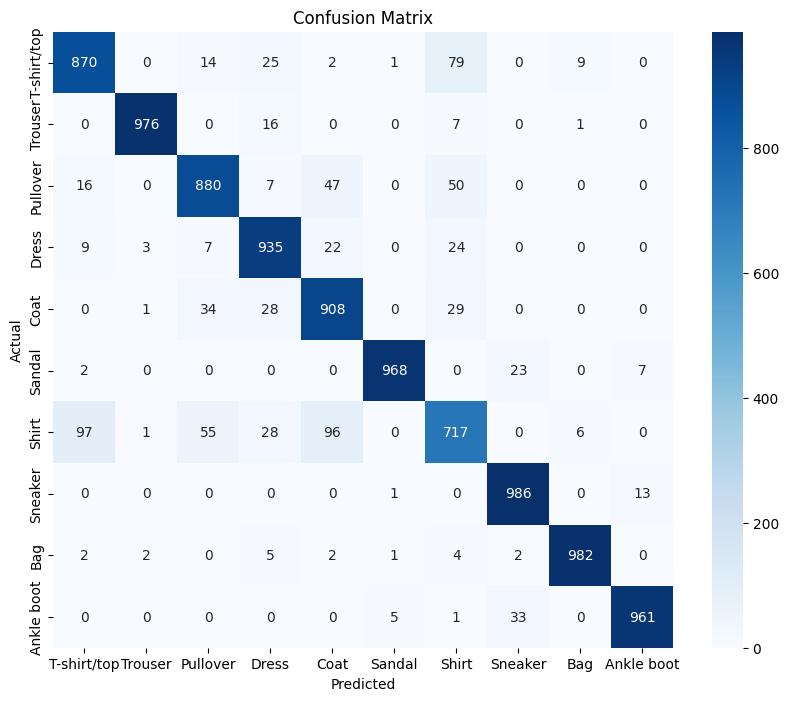

In [30]:
# Step 10: Confusion Matrix
y_pred = model.predict(x_test)
y_pred_labels = np.argmax(y_pred, axis=1)

cm = confusion_matrix(y_test, y_pred_labels)

plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=class_names,
            yticklabels=class_names)
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()
